In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,1.436207
1,2016-01-26,-0.339352
2,2016-01-27,1.391167
3,2016-01-28,5.550326
4,2016-01-29,3.434334
5,2016-01-30,5.203728
6,2016-01-31,6.164420
7,2016-02-01,6.634344
8,2016-02-02,8.656479
9,2016-02-03,10.892104


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,19.841373
349,2017-01-08,20.897530
350,2017-01-09,22.650536
351,2017-01-10,22.417791
352,2017-01-11,22.822750
353,2017-01-12,23.847727
354,2017-01-13,25.678839
355,2017-01-14,27.094453
356,2017-01-15,28.295554
357,2017-01-16,9.360934


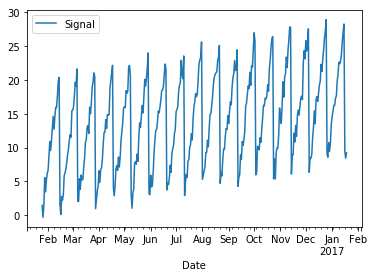

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 3.4169421195983887
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Estimation = (0 , 282) Validation = (282 , 353) Test = (353 , 360) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Min=-0.33935182494219296 Max=28.941573004927022  Mean=13.944759665883332 StdDev=6.7549349144413355
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=-0.33935182494219296 Max=28.941573004927022  Mean=13.944759665883332 StdDev=6.7549349144413355
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)' [LinearTrend + NoCycle + AR(64)]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 2.4246671199798584


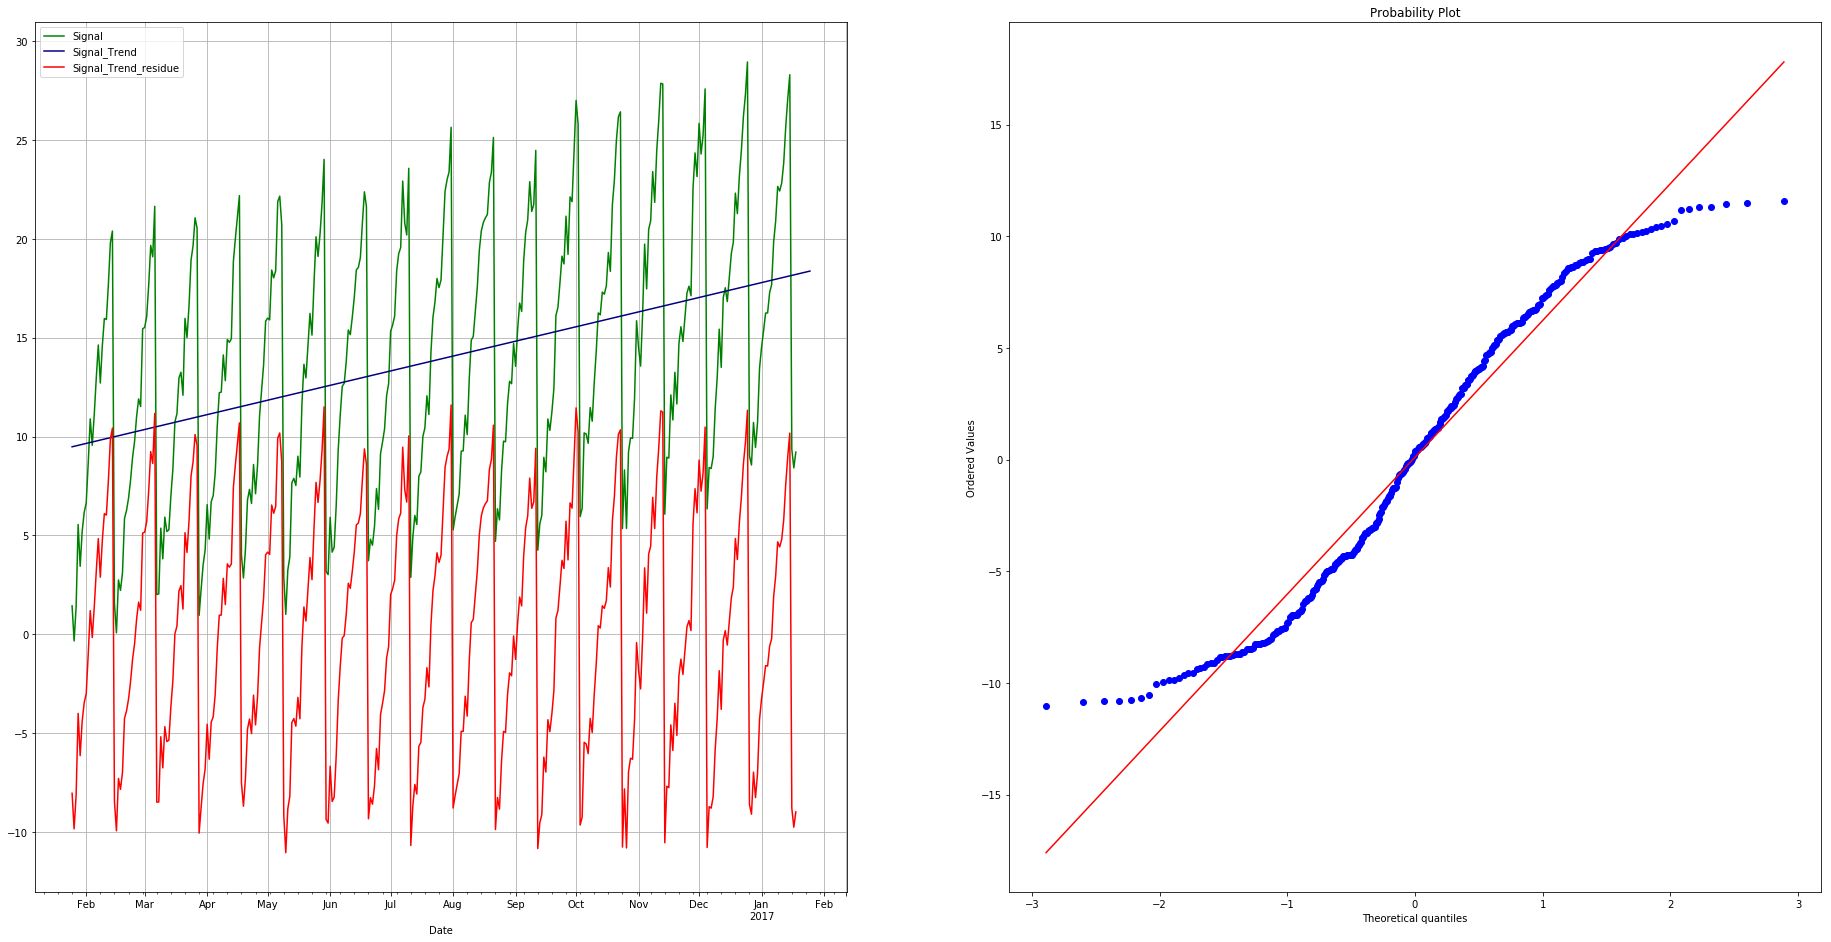

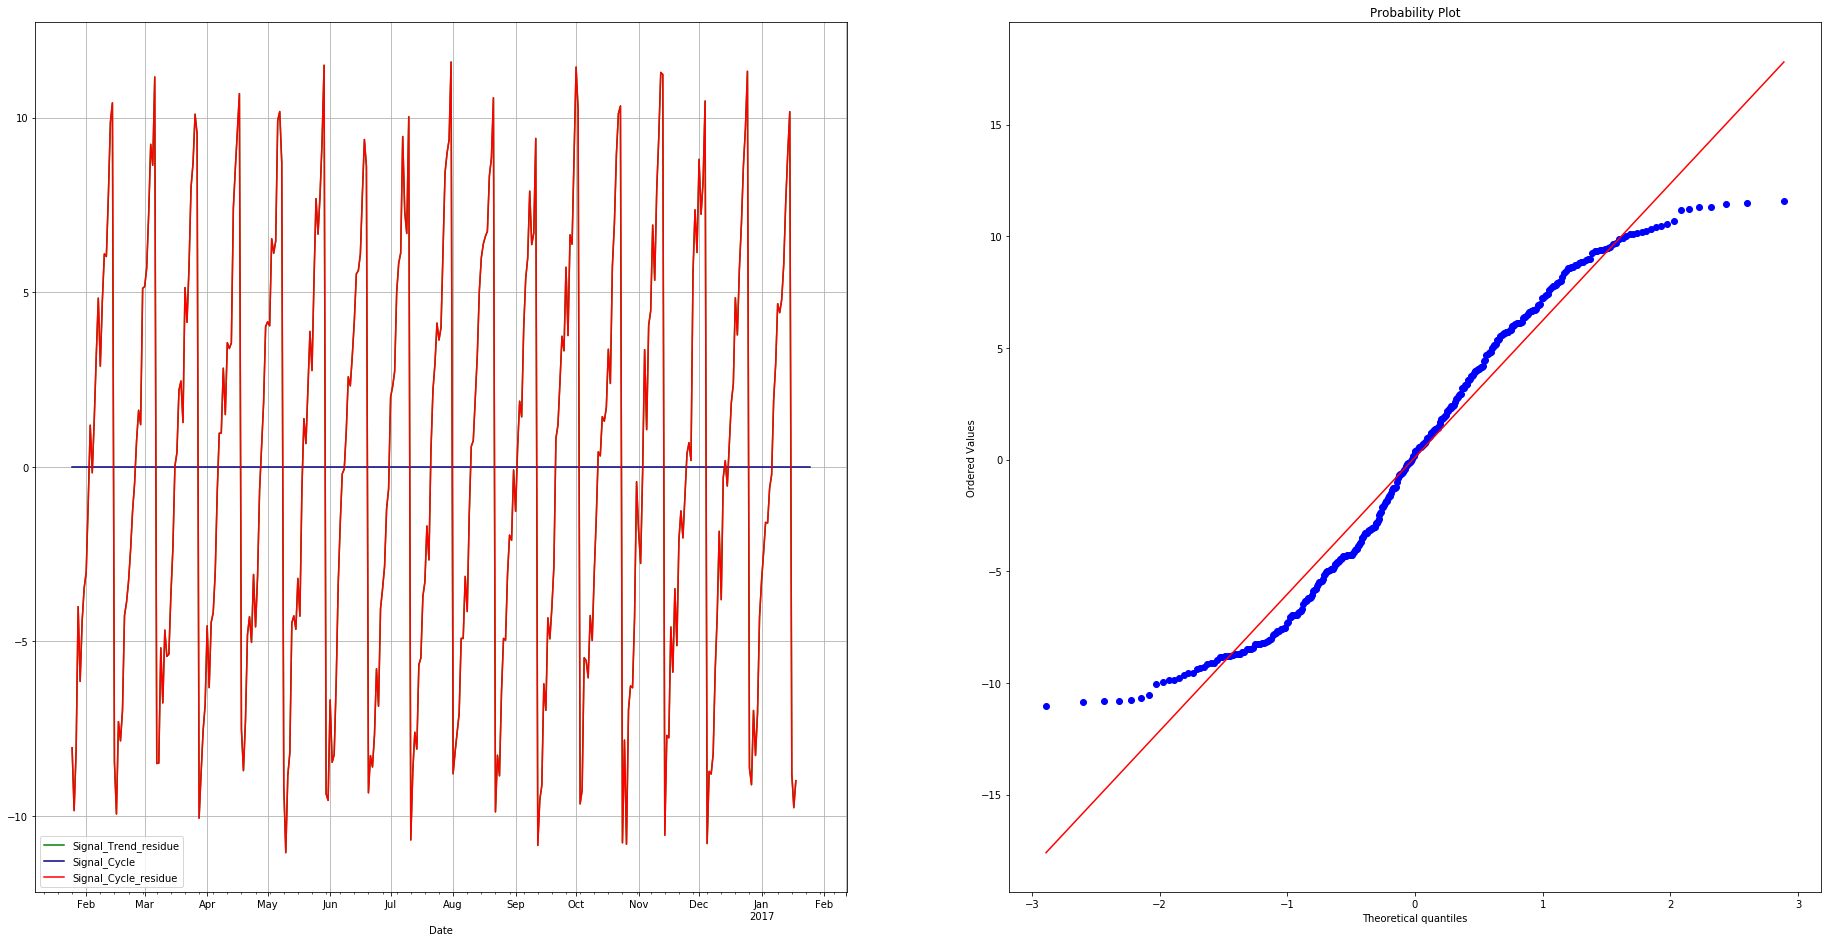

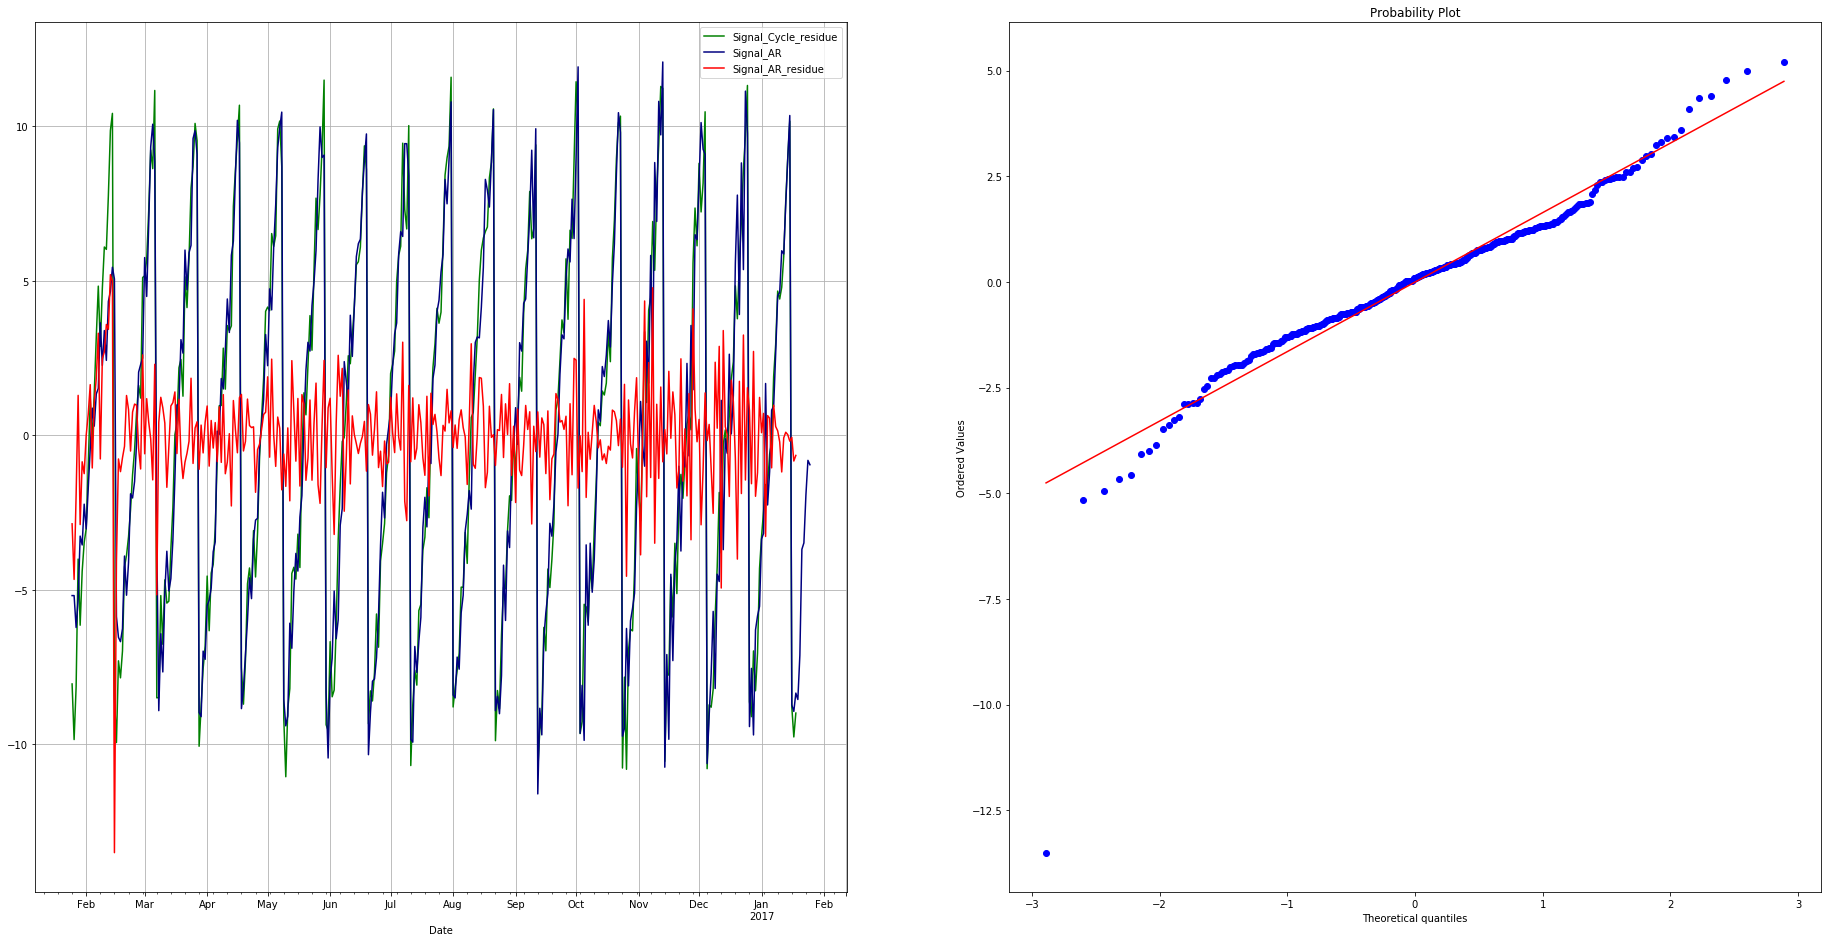

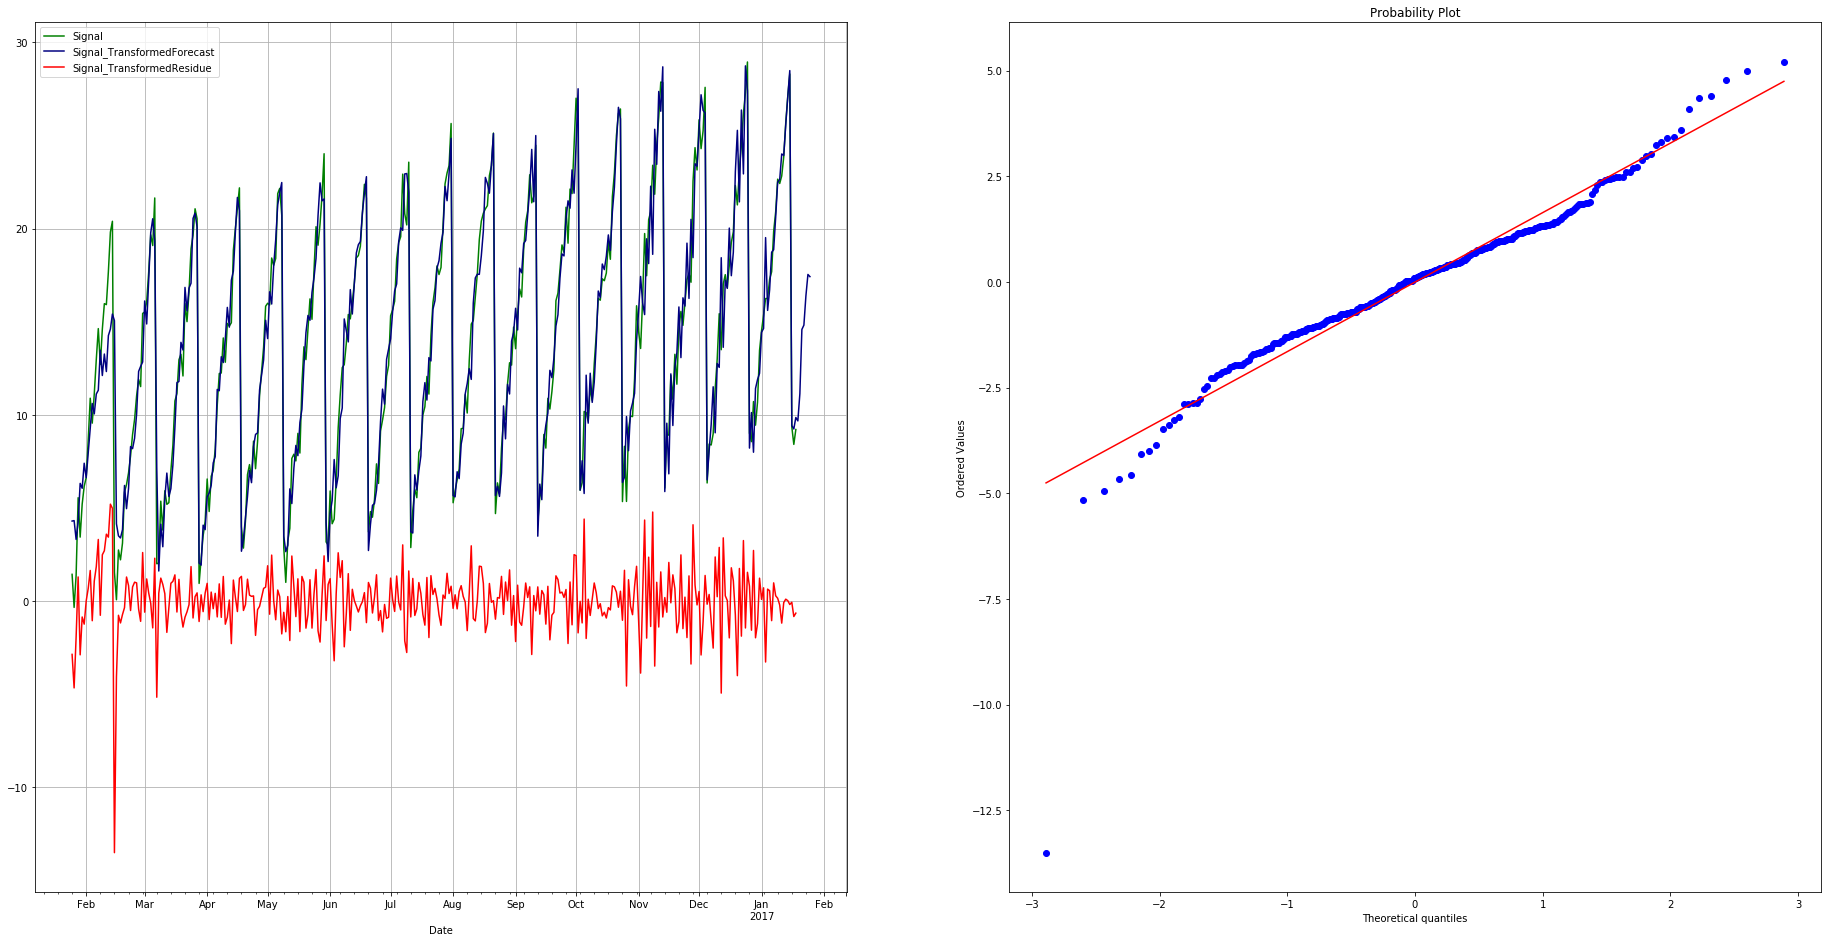

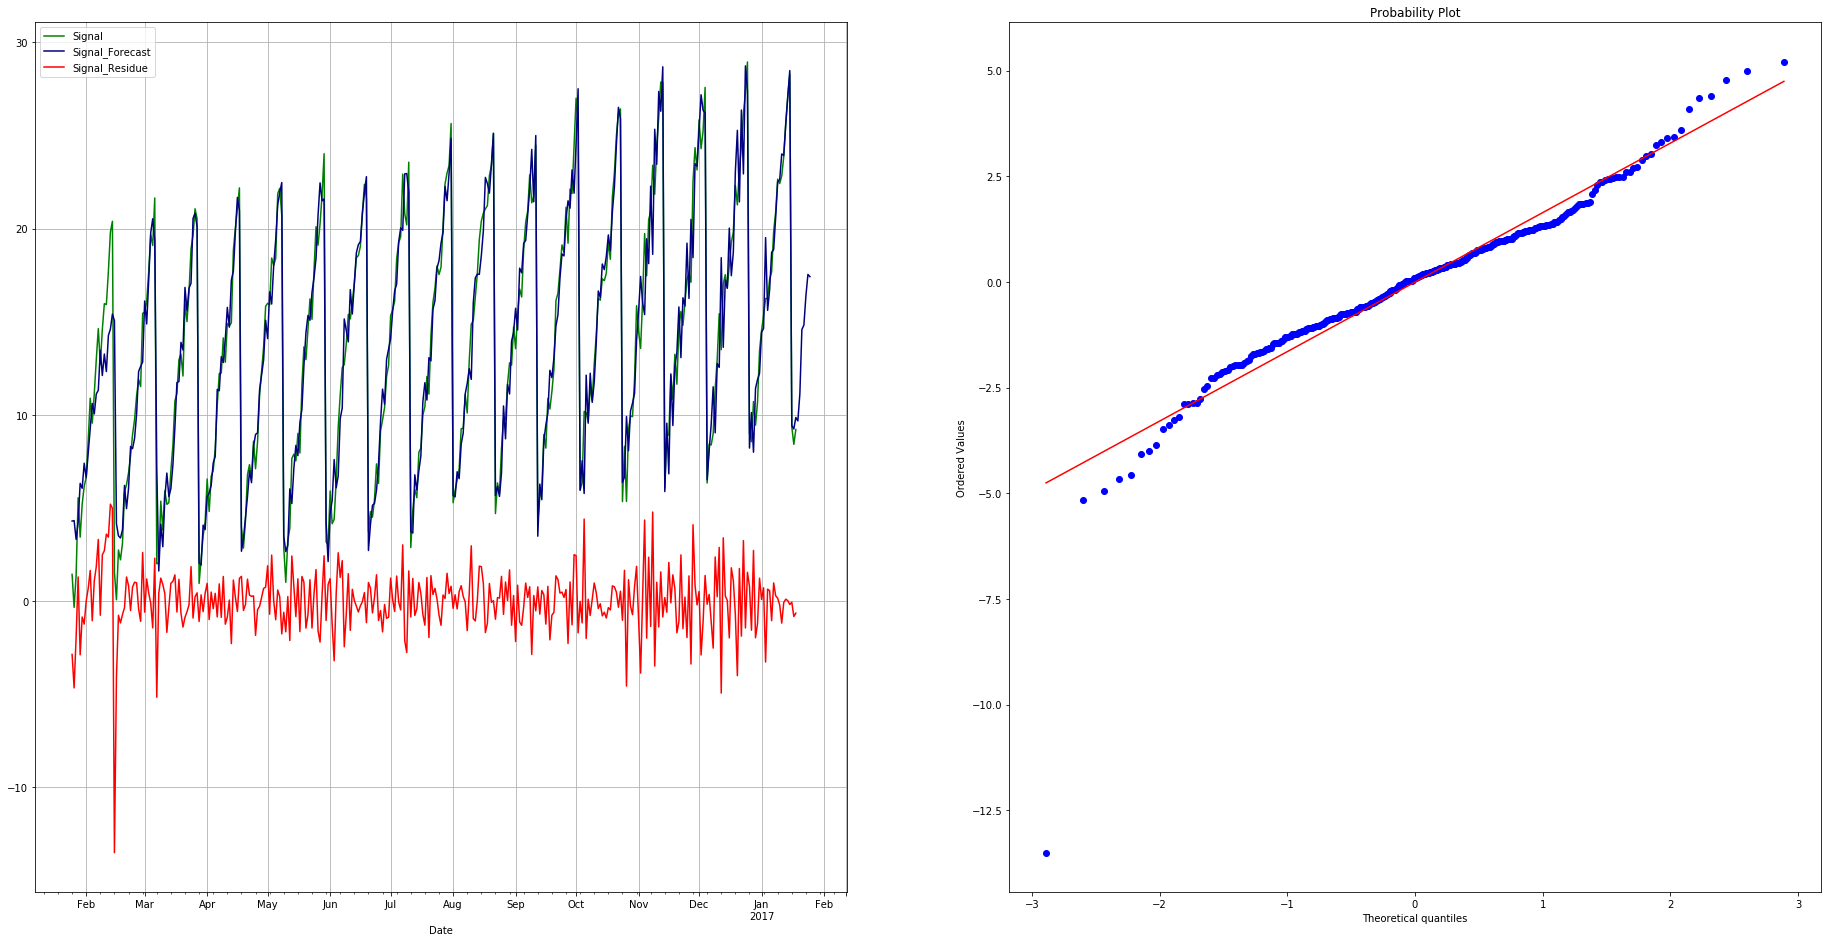

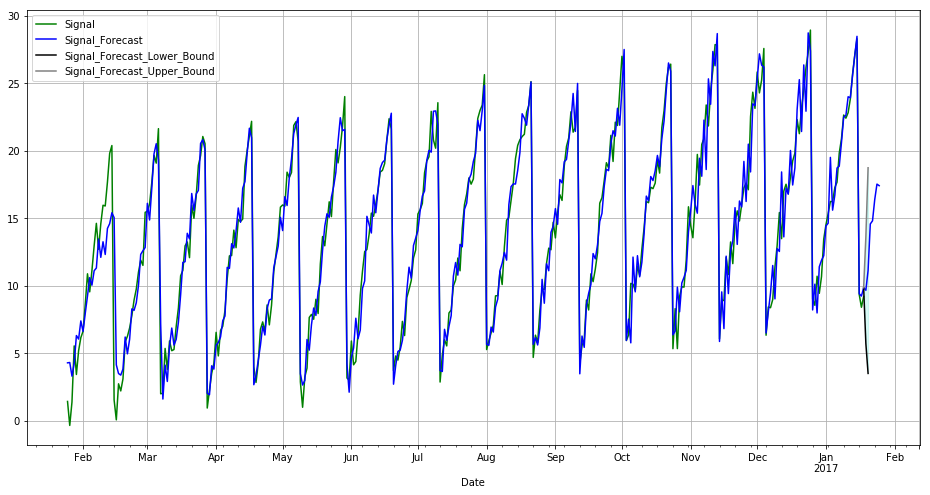

In [6]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("error")
    lEngine.standardPlots()


In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.7547671794891357


Index(['Date', 'Signal', '_Signal', 'row_number', 'Date_Normalized',
       '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_zeroCycle',
       '_Signal_LinearTrend_residue_zeroCycle_residue',
       '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound'],
      dtype='object')
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000']
[ 9.67394248 11.12908439 14.58289525 14.81455664 16.38843671 17.5